In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Utility Functions

In [85]:
def roll_die(ndie = 5) :
    "This function sample n dice with replacement"
    rolls = np.random.choice(range(1,7), ndie, replace=True)
    rolls.sort()
    return(rolls)
    
roll_die()

array([2, 3, 6, 6, 6])

### Exploratory Data Analysis

#### Odds of rolling a Yahtzee in one roll

In [90]:
N = 10000000
yahtzee_rate = np.mean([len(np.unique(roll_die())) == 1 for _ in tqdm(range(N))])
print(f'Yahtzee Rate (per {N} simulations): {yahtzee_rate}')

100%|██████████| 10000000/10000000 [02:27<00:00, 67883.11it/s]


Yahtzee Rate (per 10000000 simulations): 0.0007823


#### Odds of rolling a large straight in one roll

In [102]:
def check_straight(roll, length):
    return sorted(set(roll)) == list(range(min(roll), min(roll) + length))

N = 1000000
small_straight_prob = np.sum([check_straight(roll_die(5), 4) for _ in tqdm(range(N))]) / N
large_straight_prob = np.sum([check_straight(roll_die(5), 5) for _ in tqdm(range(N))]) / N

print(f'Probability of rolling a small straight in Yahtzee (per {N} simulations): {small_straight_prob}')
print(f'Probability of rolling a large straight in Yahtzee (per {N} simulations): {large_straight_prob}')

100%|██████████| 1000000/1000000 [00:15<00:00, 63345.76it/s]


Probability of rolling a small straight in Yahtzee (per 1000000 simulations): 0.092287
Probability of rolling a large straight in Yahtzee (per 1000000 simulations): 0.030779


In [96]:
import numpy as np
from collections import Counter

def roll_dice(num_dice, verbose=False):
    """Simulate rolling 'num_dice' six-sided dice."""
    roll = np.random.randint(1, 7, size=num_dice)
    if verbose:
        print(roll)
    return roll

def keep_highest_mode(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    counts = Counter(dice)
    highest_mode = max(counts.values())
    kept_dice = [num for num in dice if counts[num] == highest_mode and highest_mode > 1]
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice

def roll_yahtzee_odds(num_simulations=10000, verbose=False):
    yahtzee_count = 0
    for _ in range(num_simulations):
        dice = roll_dice(5, verbose=verbose)  # Roll 5 dice
        for _ in range(2):  # Perform 2 additional rolls
            dice = keep_highest_mode(dice, verbose=verbose)
        if len(set(dice)) == 1:  # If all dice are the same, it's a Yahtzee
            yahtzee_count += 1
    yahtzee_probability = yahtzee_count / num_simulations
    return yahtzee_probability

# Run the function to compute the odds
odds = roll_yahtzee_odds(1, verbose=True)
print("Probability of rolling a Yahtzee:", odds)

[4 1 2 6 3]
Keepers: [] New: [2, 4, 4, 3, 6]
Keepers: [4, 4] New: [2, 5, 4]
Probability of rolling a Yahtzee: 0.0


In [98]:
# Run the function to compute the odds
odds = roll_yahtzee_odds(1000000, verbose=False)
print("Probability of rolling a Yahtzee:", odds)

Probability of rolling a Yahtzee: 0.040967


### Yahtzee Game

In [107]:
import random

def roll_dice(num_dice=5):
  return [random.randint(1, 6) for _ in range(num_dice)]

class Yahtzee:
  def __init__(self):
    self.scores = {
      "Ones": None,
      "Twos": None,
      "Threes": None,
      "Fours": None,
      "Fives": None,
      "Sixes": None,
      "Three of a Kind": None,
      "Four of a Kind": None,
      "Full House": None,
      "Small Straight": None,
      "Large Straight": None,
      "Yahtzee": None,
      "Chance": None,
    }
    self.yahtzees = 0

  def is_full(self):
    return all(value is not None for value in self.scores.values())

  def check_potential_scores(self, roll):
    scores = {}
    if sum([dice for dice in roll if dice == 1]) > 0:
      scores["Ones"] = sum([dice for dice in roll if dice == 1])
    if sum([dice for dice in roll if dice == 2]) > 0:
      scores["Twos"] = sum([dice for dice in roll if dice == 2])
    if sum([dice for dice in roll if dice == 3]) > 0:
      scores["Threes"] = sum([dice for dice in roll if dice == 3])
    if sum([dice for dice in roll if dice == 4]) > 0:
      scores["Fours"] = sum([dice for dice in roll if dice == 4])
    if sum([dice for dice in roll if dice == 5]) > 0:
      scores["Fives"] = sum([dice for dice in roll if dice == 5])
    if sum([dice for dice in roll if dice == 6]) > 0:
      scores["Sixes"] = sum([dice for dice in roll if dice == 6])
    if self._check_n_of_a_kind(roll, 3):
      scores["Three of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 3) else 0
    if self._check_n_of_a_kind(roll, 4):
      scores["Four of a Kind"] = sum(roll)
    if self._check_full_house(roll):
      scores["Full House"] = 25
    if self._check_straight(roll, 4):
      scores["Small Straight"] = 30
    if self._check_straight(roll, 5):
      scores["Large Straight"] = 40
    if self._check_n_of_a_kind(roll, 5):
      scores["Yahtzee"] = 50
    scores["Chance"] = sum(roll)
    return scores

  def update_score(self, roll, category):
    if self._check_n_of_a_kind(roll, 5):
      self.yahtzees += 1
    if category == "Ones":
      self.scores["Ones"] = sum([dice for dice in roll if dice == 1])
    elif category == "Twos":
      self.scores["Twos"] = sum([dice for dice in roll if dice == 2])
    elif category == "Threes":
      self.scores["Threes"] = sum([dice for dice in roll if dice == 3])
    elif category == "Fours":
      self.scores["Fours"] = sum([dice for dice in roll if dice == 4])
    elif category == "Fives":
      self.scores["Fives"] = sum([dice for dice in roll if dice == 5])
    elif category == "Sixes":
      self.scores["Sixes"] = sum([dice for dice in roll if dice == 6])
    elif category == "Three of a Kind":
      self.scores["Three of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 3) else 0
    elif category == "Four of a Kind":
      self.scores["Four of a Kind"] = sum(roll) if self._check_n_of_a_kind(roll, 4) else 0
    elif category == "Full House":
      self.scores["Full House"] = 25 if self._check_full_house(roll) else 0
    elif category == "Small Straight":
      self.scores["Small Straight"] = 30 if self._check_straight(roll, 4) else 0
    elif category == "Large Straight":
      self.scores["Large Straight"] = 40 if self._check_straight(roll, 5) else 0
    elif category == "Yahtzee":
      self.scores["Yahtzee"] = 50 if self._check_n_of_a_kind(roll, 5) else 0
    elif category == "Chance":
      self.scores["Chance"] = sum(roll)

  def get_total_score(self):
    total_score = sum(self.scores.values())
    if self.yahtzees > 1:
      total_score += (self.yahtzees - 1) * 100
    upper_section = sum([self.scores[cat] for cat in ["Ones", "Twos", "Threes", "Fours", "Fives", "Sixes"]])
    if upper_section >= 63:
      total_score += 35
    return total_score

  def _check_n_of_a_kind(self, roll, n):
    return any(roll.count(value) >= n for value in set(roll))

  def _check_full_house(self, roll):
    unique_values, counts = np.unique(roll, return_counts=True)
    # Check if there are exactly two unique values (three of one number and two of another)
    if len(unique_values) == 2:
        # Check if counts are either 2 and 3, or 3 and 2
        if (counts == 2).sum() == 1 and (counts == 3).sum() == 1:
            return True
    return False

  def _check_straight(self, roll, length):
    return sorted(set(roll)) == list(range(min(roll), min(roll) + length))

### Scoring Helper Functions

In [123]:
def choose_available_category_naive(card):
  """
  A helper function which adds points to the scorecard based on the first unfilled category in the scorecard
  """
  for category, value in card.scores.items():
    if value is None:
      return category
  return None

def keep_highest_mode(dice, verbose=False):
    """Keep the dice with the highest mode, update the rest to random values."""
    counts = Counter(dice)
    highest_mode = max(counts.values())
    kept_dice = [num for num in dice if counts[num] == highest_mode and highest_mode > 1]
    dice_to_reroll = 5 - len(kept_dice)
    new_dice = [np.random.randint(1, 7) for i in range(dice_to_reroll)]
    dice = [*kept_dice, *new_dice]
    if verbose:
        print('Keepers:', kept_dice, 'New:', new_dice)
    return dice
  

### Strategy Functions

In [154]:

def naive_sequential_strategy(card, verbose=False):
  """
  This strategy just rolls the dice once and selects the first available option in the scorecard,
  effectively discarding the 2nd and 3rd rolls as opportunities to maximize points.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll, end="  ")
    available_category = choose_available_category_naive(card)
    if verbose:
      print(f'Category Selection: {available_category}')
    card.update_score(roll, available_category)
  return card

def naive_point_aware_strategy(card, verbose=False):
  """
  This strategy just rolls the dice once and selects the option in the scorecard that yields maximum points.
  It discards the 2nd and 3rd roll as opportunities to maximize points.
  """
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll, end="  ")
    scores = card.check_potential_scores(roll)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    flag = True
    # iterate through possible point-scoring categories
    for category, category_score in sorted_scores:
      if card.scores[category] is None:
        card.update_score(roll, category)
        flag = False
        if verbose:
          print(f'Category Selection: {category} ({category_score})')
        break
    # if no opportunity to score points, take a 0 in the first available category on the scorecard
    if flag:
      available_category = choose_available_category_naive(card)
      if verbose:
        print(f'Category Selection: {available_category} (0)')
      card.update_score(roll, available_category)
  return card

def greedy_strategy(card, verbose=False):
  while not card.is_full():
    roll = roll_dice()
    if verbose:
      print(roll)
    for i in range(2):
      roll = keep_highest_mode(roll, verbose=verbose)
    scores = card.check_potential_scores(roll)
    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    flag = True
    # iterate through possible point-scoring categories
    for category, category_score in sorted_scores:
      if card.scores[category] is None:
        card.update_score(roll, category)
        flag = False
        if verbose:
          print(f'Category Selection: {category} ({category_score})')
        break
    # if no opportunity to score points, take a 0 in the first available category on the scorecard
    if flag:
      available_category = choose_available_category_naive(card)
      if verbose:
        print(f'Category Selection: {available_category} (0)')
      card.update_score(roll, available_category)
  return card



In [155]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
naive_sequential_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")
total_score = card.get_total_score()

total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[1, 5, 4, 4, 2]  Category Selection: Ones
[1, 1, 2, 6, 3]  Category Selection: Twos
[1, 5, 3, 6, 3]  Category Selection: Threes
[2, 2, 4, 2, 2]  Category Selection: Fours
[5, 1, 1, 2, 4]  Category Selection: Fives
[5, 4, 1, 5, 4]  Category Selection: Sixes
[6, 4, 2, 1, 6]  Category Selection: Three of a Kind
[6, 2, 2, 1, 6]  Category Selection: Four of a Kind
[2, 6, 1, 6, 1]  Category Selection: Full House
[4, 1, 1, 2, 4]  Category Selection: Small Straight
[2, 4, 6, 1, 3]  Category Selection: Large Straight
[5, 4, 3, 5, 5]  Category Selection: Yahtzee
[4, 3, 1, 4, 6]  Category Selection: Chance
Yahtzee Scorecard:
Ones: 1
Twos: 2
Threes: 6
Fours: 4
Fives: 5
Sixes: 0
Three of a Kind: 0
Four of a Kind: 0
Full House: 0
Small Straight: 0
Large Straight: 0
Yahtzee: 0
Chance: 18
TOTAL SCORE: 36


In [156]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
naive_point_aware_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")

total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[3, 6, 6, 3, 5]  Category Selection: Chance (23)
[4, 5, 1, 4, 2]  Category Selection: Fours (8)
[4, 6, 2, 3, 5]  Category Selection: Large Straight (40)
[2, 2, 2, 5, 3]  Category Selection: Three of a Kind (14)
[1, 1, 2, 3, 2]  Category Selection: Twos (4)
[3, 5, 3, 2, 4]  Category Selection: Small Straight (30)
[3, 3, 1, 5, 6]  Category Selection: Threes (6)
[3, 4, 3, 6, 3]  Category Selection: Sixes (6)
[6, 6, 2, 1, 3]  Category Selection: Ones (1)
[3, 3, 1, 1, 3]  Category Selection: Full House (25)
[5, 6, 6, 2, 6]  Category Selection: Fives (5)
[2, 6, 6, 3, 5]  Category Selection: Four of a Kind (0)
[3, 6, 2, 6, 4]  Category Selection: Yahtzee (0)
Yahtzee Scorecard:
Ones: 1
Twos: 4
Threes: 6
Fours: 8
Fives: 5
Sixes: 6
Three of a Kind: 14
Four of a Kind: 0
Full House: 25
Small Straight: 30
Large Straight: 40
Yahtzee: 0
Chance: 23
TOTAL SCORE: 162


In [181]:
# Create a Yahtzee card object
card = Yahtzee()

# Run the simple strategy on the card
greedy_strategy(card, verbose=True)

# Print the final scores
print("Yahtzee Scorecard:")
for category, score in card.scores.items():
  print(f"{category}: {score}")

print(card.yahtzees)
total_score = card.get_total_score()
print('TOTAL SCORE:', total_score)

[6, 6, 4, 3, 6]
Keepers: [6, 6, 6] New: [2, 3]
Keepers: [6, 6, 6] New: [6, 1]
Category Selection: Three of a Kind (25)
[1, 3, 1, 5, 5]
Keepers: [1, 1, 5, 5] New: [4]
Keepers: [1, 1, 5, 5] New: [1]
Category Selection: Full House (25)
[2, 2, 5, 4, 2]
Keepers: [2, 2, 2] New: [4, 6]
Keepers: [2, 2, 2] New: [1, 4]
Category Selection: Chance (11)
[5, 6, 6, 5, 1]
Keepers: [5, 6, 6, 5] New: [6]
Keepers: [6, 6, 6] New: [3, 5]
Category Selection: Sixes (18)
[6, 1, 3, 2, 6]
Keepers: [6, 6] New: [1, 3, 4]
Keepers: [6, 6] New: [1, 2, 5]
Category Selection: Fives (5)
[1, 3, 2, 2, 3]
Keepers: [3, 2, 2, 3] New: [3]
Keepers: [3, 3, 3] New: [2, 1]
Category Selection: Threes (9)
[3, 2, 6, 2, 6]
Keepers: [2, 6, 2, 6] New: [5]
Keepers: [2, 6, 2, 6] New: [6]
Category Selection: Twos (4)
[2, 2, 1, 3, 2]
Keepers: [2, 2, 2] New: [2, 3]
Keepers: [2, 2, 2, 2] New: [1]
Category Selection: Four of a Kind (9)
[6, 3, 6, 2, 1]
Keepers: [6, 6] New: [4, 3, 6]
Keepers: [6, 6, 6] New: [1, 3]
Category Selection: Ones (1)


### Strategy Simulations

In [189]:
def test_strategy(strat):
    """
    Run one instance of a Yahtzee game simulation given a strategy function. Report the score and how many Yahtzees were scored.
    """

    # Create a Yahtzee card object
    card = Yahtzee()

    # Run the simple strategy on the card
    strat(card)

    # Return total Yahtzee score and number of Yahtzees scored
    return card.get_total_score(), card.yahtzees


In [190]:
test_strategy(greedy_strategy)

(150, 0)

In [192]:
N = 10000
data = []
strat_func_dict = {
    'Naive Sequential': naive_sequential_strategy, 
    'Naive Point Aware': naive_point_aware_strategy, 
    'Greedy': greedy_strategy
}
for i in tqdm(range(N)):
    for strat in ['Naive Sequential', 'Naive Point Aware', 'Greedy']:
        score, num_yahtzees = test_strategy(strat_func_dict[strat])
        data.append([strat, score, num_yahtzees])

df = pd.DataFrame(data, columns=['Strategy', 'Score', 'Num Yahtzees'])
df

100%|██████████| 10000/10000 [00:11<00:00, 901.50it/s]


,Strategy,Score,Num Yahtzees
0,Naive Sequential,43,0
1,Naive Point Aware,112,0
2,Greedy,93,0
3,Naive Sequential,33,0
4,Naive Point Aware,108,0
...,...,...,...
29995,Naive Point Aware,102,0
29996,Greedy,114,0
29997,Naive Sequential,52,0
29998,Naive Point Aware,109,0


<Axes: ylabel='Score'>

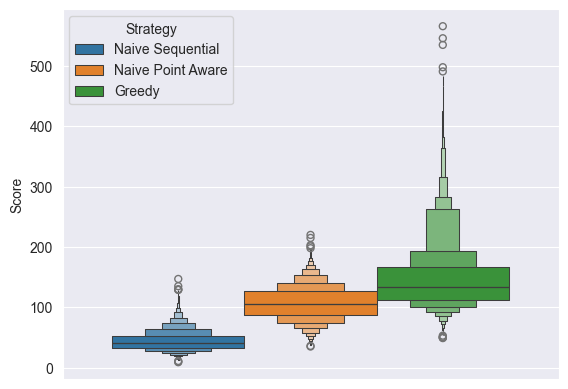

In [193]:
import seaborn as sns
sns.set_style('darkgrid')
sns.boxenplot(data=df, y='Score', hue='Strategy')